# Independent FldStat methods in reader for AQUA

Retrieve the data:

In [5]:
from aqua import Reader

reader = Reader(model='PSC', exp='PIOMAS', source='monthly', regrid="r100", loglevel='info') # PIOMAS or GIOMAS // info or debug
data = reader.retrieve()

2025-10-02 15:22:35 :: ConfigPath :: INFO     -> PSC_PIOMAS_monthly triplet found in in obs!
2025-10-02 15:22:35 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-10-02 15:22:35 :: Fixer :: INFO     -> Fix names in metadata is PIOMAS
2025-10-02 15:22:35 :: Fixer :: INFO     -> Fix names PIOMAS found in fixes files
2025-10-02 15:22:36 :: Reader :: INFO     -> Grid metadata is psc-piomas
2025-10-02 15:22:36 :: Regridder :: INFO     -> Grid name: psc-piomas
2025-10-02 15:22:36 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_psc-piomas.nc.
2025-10-02 15:22:36 :: CoordTransformer :: INFO     -> Grid type: Curvilinear
2025-10-02 15:22:36 :: CoordTransformer :: INFO     -> Target data model: aqua
2025-10-02 15:22:36 :: CoordTransformer :: INFO     -> Loading data model from /users/tovazzie/.aqua/data_model/aqua.yaml
2025-10-02 15:22:36 :: CoordTransformer :: INFO     -> Analysing coordinate: latitude
2

In [ ]:
data_retr = data['sithick']
data_retr

<xarray.DataArray 'sithick' (time: 552, y: 120, x: 360)> Size: 95MB
dask.array<getitem, shape=(552, 120, 360), dtype=float32, chunksize=(1, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
    lon      (y, x) float32 173kB dask.array<chunksize=(120, 360), meta=np.ndarray>
    lat      (y, x) float32 173kB dask.array<chunksize=(120, 360), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes:
    standard_name:  sea_ice_thickness
    long_name:      Sea ice thickness
    units:          m
    paramId:        262000
    shortName:      sithick
    cfVarName:      sithick
    AQUA_model:     PSC
    AQUA_exp:       PIOMAS
    AQUA_source:    monthly
    AQUA_catalog:   obs
    AQUA_version:   0.18.0-alpha

In [29]:
data['sithick']

<xarray.DataArray 'sithick' (time: 552, y: 120, x: 360)> Size: 95MB
dask.array<getitem, shape=(552, 120, 360), dtype=float32, chunksize=(1, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
    lon      (y, x) float32 173kB dask.array<chunksize=(120, 360), meta=np.ndarray>
    lat      (y, x) float32 173kB dask.array<chunksize=(120, 360), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes:
    standard_name:  sea_ice_thickness
    long_name:      Sea ice thickness
    units:          m
    paramId:        262000
    shortName:      sithick
    cfVarName:      sithick
    AQUA_model:     PSC
    AQUA_exp:       PIOMAS
    AQUA_source:    monthly
    AQUA_catalog:   obs
    AQUA_version:   0.18.0-alpha

## Regrid data

Regridding to go from `['x','y']` curvilinear coordinates to both the dimensions and coordinates `['lat', 'lon']`

In [7]:
regrid_data = reader.regrid(data['sithick'])
regrid_data

2025-10-02 15:23:58 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-10-02 15:23:58 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-10-02 15:23:58 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-10-02 15:23:58 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-10-02 15:23:58 | smmregrid.Regrid |     INFO -> Assuming gridtype from data to be the same from weights
2025-10-02 15:23:58 | smmregrid.Regrid |     INFO -> Interpolating from CDO curvilinear to CDO lonlat
2025-10-02 15:23:58 | smmregrid.Regrid |     INFO -> Regridding from (552, 120, 360) to [360 180]


<xarray.DataArray 'sithick' (time: 552, lat: 180, lon: 360)> Size: 286MB
dask.array<reshape, shape=(552, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Attributes:
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    AQUA_model:      PSC
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1

## FieldStat - Mean

Testing the exposed method `fldstat` in `Reader` to get the `mean` (automatically detect the horizontal spatial dimensions):

In [10]:
fst = reader.fldmean(regrid_data)
fst


2025-10-02 15:25:26 :: FldStat :: INFO     -> Computing area-weighted mean on ['lat', 'lon'] dimensions


<xarray.DataArray 'sithick' (time: 552)> Size: 4kB
dask.array<truediv, shape=(552,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Attributes: (12/13)
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-10-02 15:25:26 AQUA💧: From grid 'r100'. Computed ...

or alternatively

In [3]:
fst = reader.fldstat(regrid_data, stat='mean')
fst

2025-09-29 19:09:54 :: FldStat :: INFO     -> Computing area-weighted mean on ['lon', 'lat'] dimensions


<xarray.DataArray 'sithick' (time: 552)> Size: 4kB
dask.array<truediv, shape=(552,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Attributes: (12/13)
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-09-29 19:09:54 AQUA💧: Spatially reduced by fldmea...

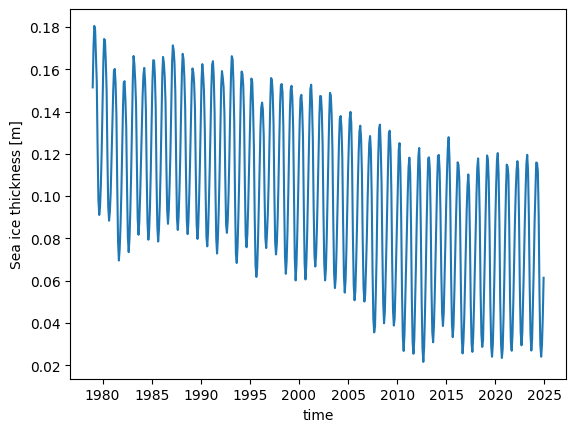

In [4]:
fst.plot()

---

#  FieldStat - Mean: dims 'lon'

Perform the mean acros the longitude:

In [31]:
fst_lat = reader.fldstat(regrid_data, stat='mean', dims=['lon'])
fst_lat

2025-09-29 16:42:44 :: FldStat :: INFO     -> Computing area-weighted mean on ['lon'] dimensions


<xarray.DataArray 'sithick' (time: 552, lat: 180)> Size: 795kB
dask.array<truediv, shape=(552, 180), dtype=float64, chunksize=(1, 180), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/13)
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-09-29 16:42:44 AQUA💧: Spatially reduced by fldmea...

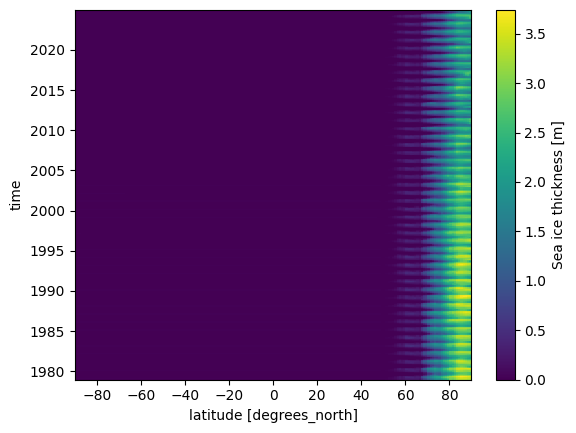

In [11]:
fst_lat.plot()

### Select specific time

In [12]:
fst_lat_t0 = fst_lat.isel(time=0)

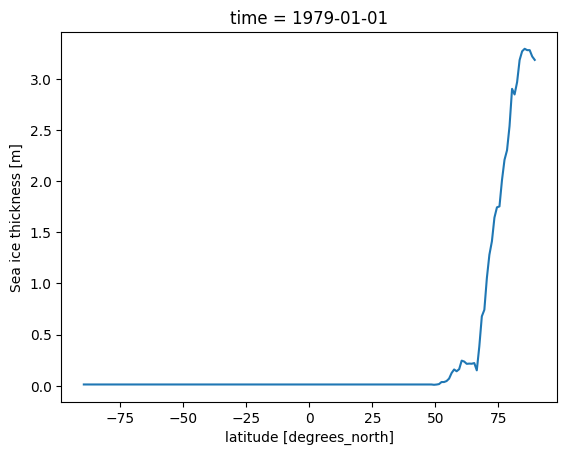

In [13]:
fst_lat_t0.plot()

---

# FieldStat - Sum: dims 'lon'

In [26]:
fst_lat_sum = reader.fldstat(regrid_data, stat='sum', dims=['lon'])
fst_lat_sum_t0 = fst_lat_sum.isel(time=22)
fst_lat_sum_t0

2025-09-29 16:38:37 :: FldStat :: INFO     -> Computing area-weighted sum on ['lon'] dimensions


<xarray.DataArray 'sithick' (lat: 180)> Size: 1kB
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(180,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 1980-11-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/13)
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-09-29 16:38:37 AQUA💧: Spatially reduced by fldsum...

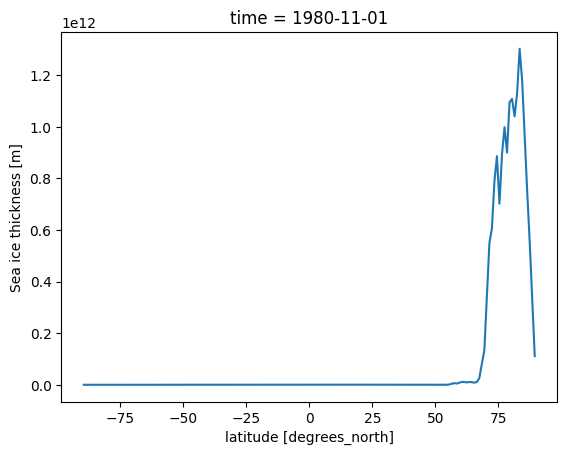

In [27]:
fst_lat_sum_t0.plot()

---

# Standar deviation

In [5]:
fst_lat_std = reader.fldstat(regrid_data, stat='std', dims=['lon'])
print(fst_lat_std, '\n')

fst_lat_std_t0 = fst_lat_std.isel(time=0)
print(fst_lat_std_t0)
fst_lat_std_t0


2025-09-29 19:10:12 :: FldStat :: INFO     -> Computing area-weighted std on ['lon'] dimensions


<xarray.DataArray 'sithick' (time: 552, lat: 180)> Size: 795kB
dask.array<sqrt, shape=(552, 180), dtype=float64, chunksize=(1, 180), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/13)
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-09-29 19:10:12 AQUA💧: Spatially reduced by fldstd... 

<xarray.DataArray 'sithick' (lat: 180)> Size: 1kB
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(180,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 1979-01-01
  * lat      (lat) floa

<xarray.DataArray 'sithick' (lat: 180)> Size: 1kB
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(180,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 1979-01-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/13)
    standard_name:   sea_ice_thickness
    long_name:       Sea ice thickness
    units:           m
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-09-29 19:10:12 AQUA💧: Spatially reduced by fldstd...

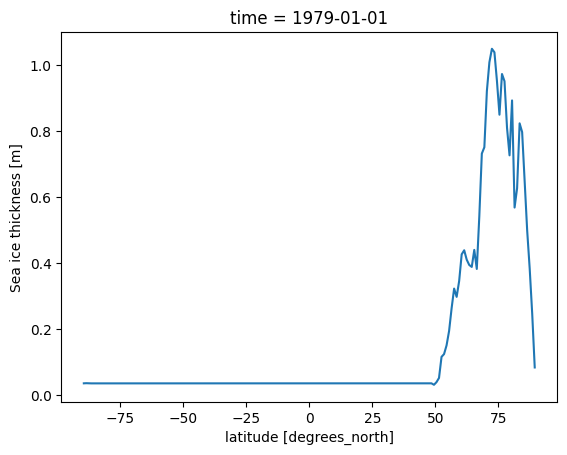

In [6]:
fst_lat_std_t0.plot()

---

## Plot 'integral'

Can later divide by `10^12` to get units in `thousands km^2`, but ylabel units will not be updated correspondently.

In [3]:
fst_lat_itg = reader.fldstat(regrid_data, stat='integral')
fst_lat_itg

2025-10-02 12:51:14 :: FldStat :: INFO     -> Computing area-weighted integral on ['lat', 'lon'] dimensions


<xarray.DataArray (time: 552)> Size: 4kB
dask.array<where, shape=(552,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Attributes: (12/13)
    standard_name:   area
    long_name:       Integrated Sea ice thickness
    units:           meter ** 3
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-10-02 12:51:14 AQUA💧: From grid 'r100'. Computed ...

2025-10-02 12:55:11 :: FldStat :: INFO     -> Computing area-weighted integral on ['lat', 'lon'] dimensions


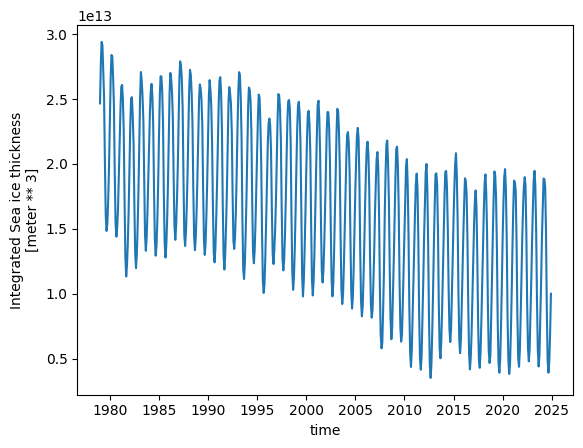

In [9]:
fst_lat_itg = reader.fldstat(regrid_data, stat='integral')
fst_lat_itg.plot()

2025-10-02 13:18:26 :: FldStat :: INFO     -> Computing area-weighted integral on ['lon', 'lat'] dimensions


<xarray.DataArray (time: 552)> Size: 4kB
dask.array<truediv, shape=(552,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Attributes: (12/13)
    standard_name:   area
    long_name:       Integrated Sea ice thickness
    units:           thousand km3
    paramId:         262000
    shortName:       sithick
    cfVarName:       sithick
    ...              ...
    AQUA_exp:        PIOMAS
    AQUA_source:     monthly
    AQUA_catalog:    obs
    AQUA_version:    0.18.0-alpha
    AQUA_regridded:  1
    history:         \n2025-10-02 13:18:27 AQUA💧: From grid 'r100'. Computed ...


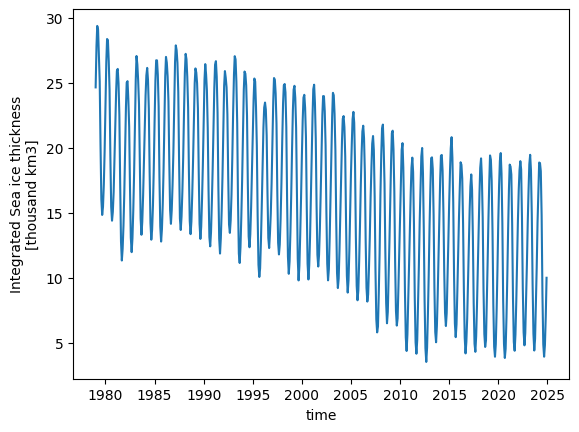

In [6]:
# divide by 1e12 to convert from m^2 to millions km^2
fst_lat_itg_mkms = reader.fldstat(regrid_data, stat='integral') / 1e12
fst_lat_itg_mkms.attrs["units"] = "thousand km3"
print(fst_lat_itg_mkms)

# note that units will not be fixed after the conversion if no manual substitution is done
fst_lat_itg_mkms.plot()

---

# Plot sum area cells

After calculating the sea ice extension, divide by `10^12` to get units in `millions km^2`, but ylabel units will not be updated correspondently.  
[Note]: If data in latex example is not masked, the sum of the areas would give a constant value, as no variability is introduced.

2025-10-02 15:49:21 :: FldStat :: INFO     -> Computing area-weighted areasum on ['lat', 'lon'] dimensions


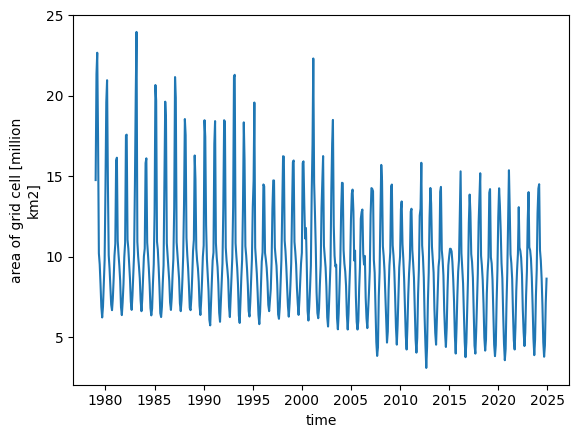

In [11]:
masked_data = regrid_data.where((regrid_data > 0.15))
fst_areasum = reader.fldstat(masked_data, stat='areasum') / 1e12
fst_areasum.attrs["units"] = "million km2"
fst_areasum.plot()

As an example, let's add a `lat_limits` keyword argument to only select the sea ice area found above the parallel  
correspondent to the latitude of Longyearbyen (Svalbard) ~ 78.13 degrees North.

2025-10-02 15:57:09 :: FldStat :: INFO     -> Computing area-weighted areasum on ['lat', 'lon'] dimensions


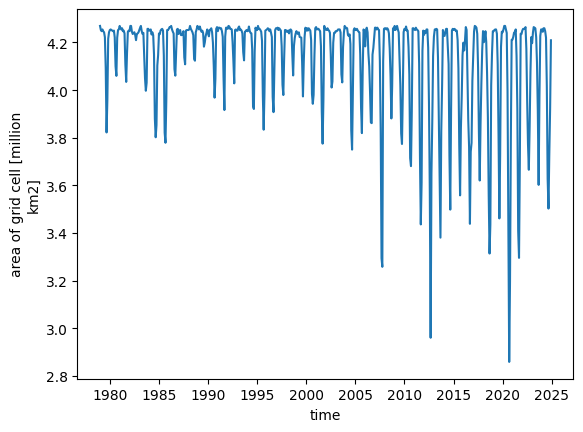

In [16]:
masked_data = regrid_data.where((regrid_data > 0.15))
fst_areasum = reader.fldstat(masked_data, stat='areasum', lat_limits=[78.13, 90]) / 1e12
fst_areasum.attrs["units"] = "million km2"
fst_areasum.plot()


### Calculate sea ice extension along dim: 'lon'

2025-10-02 14:30:32 :: FldStat :: INFO     -> Computing area-weighted areasum on ['lon'] dimensions


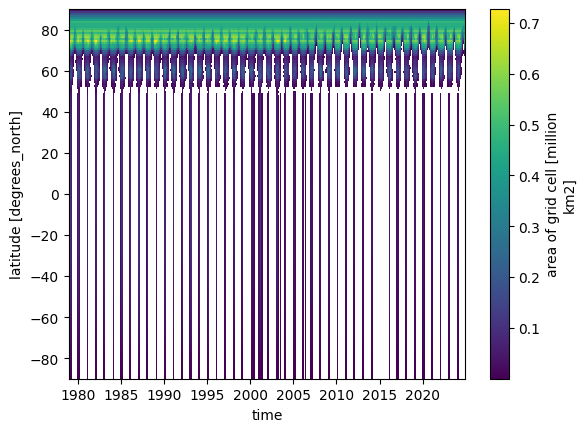

In [4]:
masked_data = regrid_data.where((regrid_data > 0.15))
fst_areasum_lon = reader.fldstat(masked_data, stat='areasum', dims=['lon']) / 1e12
fst_areasum_lon.attrs["units"] = "million km2"
fst_areasum_lon.plot()